In [44]:
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.nn.functional as F
import torch

In [172]:
class SentimentAnalysis(nn.Module):
    
    def __init__(self, categories):
        
        super().__init__()
        self.input_layer = nn.Linear(categories,1) 
        
        
    def forward(self,x):
        
        x = self.input_layer(x)
              
        return torch.sigmoid(x)

In [173]:
text = ['I like dogs', 'I hate dogs', 'I enjoy this day', 'I hate this day', 'I dislike this day', 
        'I dislike him', 'I like cats', 'I hate cats', 'I like dolphins','I hate dolphins']
labels = torch.FloatTensor([1,0,1,0,0,0,1,0,1,0])

In [174]:
text = [[word.lower() for word in sentence.split()] for sentence in text]

vocab = {}
i = 0
for sentence in text:
    for word in sentence:
        if word not in vocab:
            vocab[word] = i
            i += 1

    
matrix = torch.zeros(len(text), len(vocab))


In [175]:
for i, sentence in enumerate(text):
    for word in sentence:
        matrix[i,vocab[word]] = 1
matrix

tensor([[1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
        [1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.]])

In [182]:
classifier = SentimentAnalysis(len(vocab))

In [183]:
cost = nn.BCELoss()
losses = []
optimizer = torch.optim.SGD(classifier.parameters(), lr = 0.01)
epochs = 100



for i in range(epochs):
    y_pred = classifier.forward(matrix)
    
    loss = cost(y_pred, labels)
    
    print(loss)
    
    
    losses.append(loss)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    

tensor(0.6514, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6505, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6496, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6487, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6478, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6469, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6460, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6451, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6442, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6433, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6424, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6416, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6407, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6398, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6390, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6381, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6373, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6364, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6356, grad_fn=<BinaryCrossEntropyBack

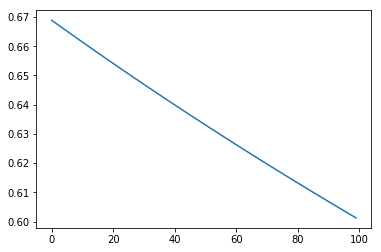

In [178]:
plt.plot(losses)

In [180]:
values = classifier.input_layer.weight
i = 0
for word in vocab:
    
    print(f'Word:{word} ------ Sentiment:{values[0][i]}')
    i += 1

Word:i ------ Sentiment:-0.22092340886592865
Word:like ------ Sentiment:0.1688767522573471
Word:dogs ------ Sentiment:-0.004150941502302885
Word:hate ------ Sentiment:-0.25973549485206604
Word:enjoy ------ Sentiment:0.05754153057932854
Word:this ------ Sentiment:0.2783777713775635
Word:day ------ Sentiment:-0.25822699069976807
Word:dislike ------ Sentiment:-0.15536090731620789
Word:him ------ Sentiment:0.1297753006219864
Word:cats ------ Sentiment:0.11567426472902298
Word:dolphins ------ Sentiment:-0.2243172824382782
